
**Here there are some information shared of different countries. There is a NGO with a fund of approx $100 million. They want to use it in countries who needs really needs it. Identify different groups of countries based on these metrics and label them. Also tell which group of countries need to be helped**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Country-data.xls')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df1 = df.drop('country' , axis = 1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)
df1_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [5]:
from sklearn.cluster import KMeans

losses = []

for i in range(1,11):
  model1 = KMeans(n_clusters = i)
  model1.fit(df1_scaled)
  losses.append(model1.inertia_)

Text(0, 0.5, 'Losses')

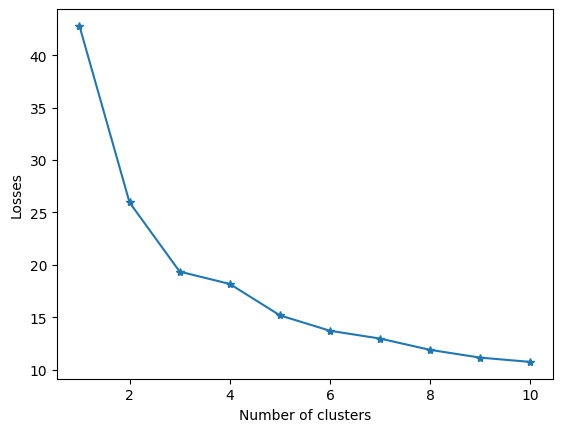

In [6]:
plt.plot(range(1,11),losses , marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Losses')

In [7]:
model2 = KMeans(n_clusters = 4)
model2.fit(df1_scaled)

df_clusters_centers = pd.DataFrame(model2.cluster_centers_,columns = df1.columns)

In [8]:
df_clusters_centers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.011184,0.291771,0.441730,0.295760,0.363321,0.062333,0.949620,0.093240,0.409340
1,0.443969,0.151124,0.208076,0.216285,0.025036,0.168459,0.557779,0.655363,0.014963
2,0.091892,0.203011,0.264229,0.268139,0.098708,0.109641,0.808203,0.176428,0.062356
3,0.392535,0.136903,0.499233,0.333119,0.029310,0.099831,0.492439,0.478023,0.019015


<Axes: >

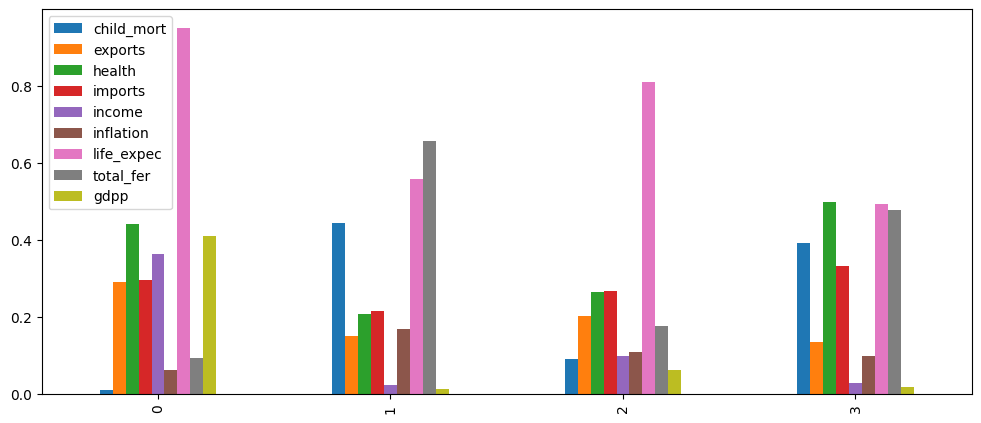

In [9]:
df_clusters_centers.plot.bar(figsize = (12,5))

In [10]:
predicted_cluster_labels = model2.predict(df1_scaled)

In [11]:
predicted_cluster_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 3,
       2, 0, 2, 1, 3, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 3, 2,
       3, 2, 0, 2, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 1, 3, 0, 2, 1, 2, 2, 3,
       3, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 1, 2, 2,
       3, 0, 0, 0, 3, 3, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [12]:
df[predicted_cluster_labels == 1].country

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
80                        Kenya
84                          Lao
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113                     Nigeria
116                    Pakistan
129                     Senegal
142                       Sudan
147                    Tanzania
149                 Timor-Leste
155     